In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

df = pd.read_csv(r'C:\Users\xande\documents\Portfolio Project\Python\movies.csv')

In [4]:
# find percentage of missing data, if any
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [5]:
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object


In [6]:
# create correct year column

df['yearcorrect'] = df['released']
count = 0
while count < len(df['released']):
    year = df['released'][count]
    commaloc = year.find(',') + 2
    df['yearcorrect'][count] = year[commaloc:commaloc+4]
    count += 1

In [7]:
#remove any duplicates
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
1,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
2,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,"December 15, 2017 (United States)",7.0,581000,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,1332698830,Walt Disney Pictures,152.0,2017
3,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000,657926987,Warner Bros.,120.0,2017
4,Pirates of the Caribbean: at World's End,PG-13,Action,2007,"May 25, 2007 (United States)",7.1,608000,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000,960996492,Walt Disney Pictures,169.0,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5431,The Living End,Unrated,Comedy,1992,"August 21, 1992 (United States)",6.5,2900,Gregg Araki,Gregg Araki,Mike Dytri,United States,22769,692585,Desperate Pictures,81.0,1992
5432,Paranormal Activity,R,Horror,2007,"October 16, 2009 (United States)",6.3,225000,Oren Peli,Oren Peli,Katie Featherston,United States,15000,193355800,Solana Films,86.0,2009
5433,Primer,PG-13,Drama,2004,"May 27, 2005 (Spain)",6.9,101000,Shane Carruth,Shane Carruth,Shane Carruth,United States,7000,545436,ERBP,77.0,2005
5434,El Mariachi,R,Action,1992,"February 26, 1993 (United States)",6.9,64000,Robert Rodriguez,Robert Rodriguez,Carlos Gallardo,Mexico,7000,2040920,Columbia Pictures,81.0,1993


In [13]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
22,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
0,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
68,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
21,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
1,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


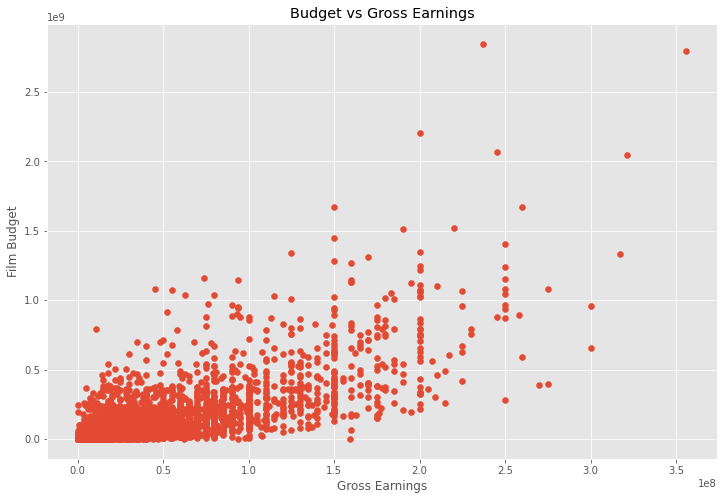

In [12]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Film Budget')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

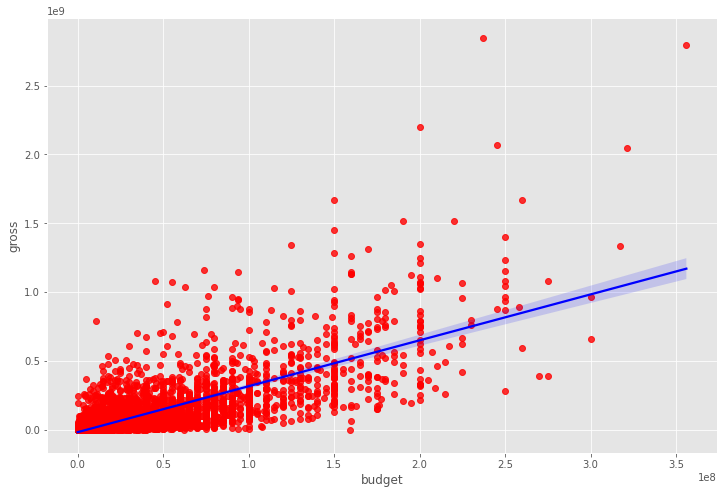

In [16]:
# plt budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})



In [18]:
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.055174,0.205758,0.327781,0.274264,0.074203
score,0.055174,1.000000,0.473809,0.071792,0.222143,0.414580
votes,0.205758,0.473809,1.000000,0.440021,0.614904,0.352437
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318595
gross,0.274264,0.222143,0.614904,0.740395,1.000000,0.275596
runtime,0.074203,0.414580,0.352437,0.318595,0.275596,1.000000


In [19]:
# there was a high correlation between budget and gross - .74

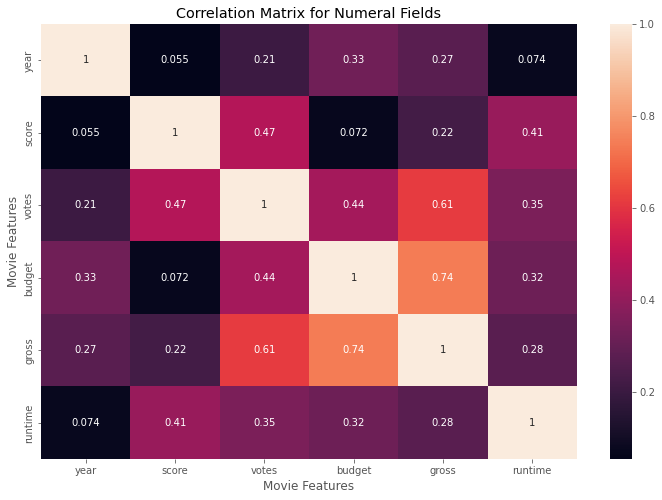

In [21]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeral Fields')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [22]:
# exploring correlations with Company

In [26]:
df_numerized = df

for col in df_numerized.columns:
    if(df_numerized[col].dtype == 'object'):
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
22,Avatar,PG-13,0,2009,525,7.8,1100000,787,1265,1538,47,237000000,2847246203,1388,162.0,29
0,Avengers: Endgame,PG-13,0,2019,135,8.4,903000,106,515,1474,47,356000000,2797501328,987,181.0,39
68,Titanic,PG-13,6,1997,532,7.8,1100000,787,1265,1076,47,200000000,2201647264,1388,194.0,17
21,Star Wars: Episode VII - The Force Awakens,PG-13,0,2015,527,7.8,876000,770,1810,357,47,245000000,2069521700,949,138.0,35
1,Avengers: Infinity War,PG-13,0,2018,143,8.4,897000,106,515,1474,47,321000000,2048359754,987,149.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4725,Philadelphia Experiment II,PG-13,0,1993,1468,4.5,1900,1810,3112,187,47,5000000,2970,1382,97.0,14
4724,Ginger Snaps,Not Rated,6,2000,1723,6.8,43000,954,1687,528,6,5000000,2554,468,108.0,21
5325,Parasite,R,9,1982,1527,3.9,2300,263,55,1477,47,800000,2270,584,85.0,2
3885,Madadayo,NaN,6,1993,61,7.3,5100,23,1220,1687,26,11900000,596,492,134.0,13


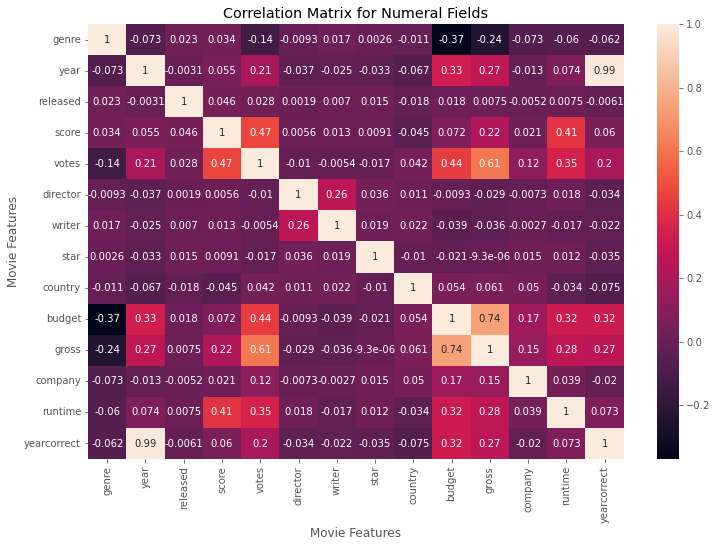

In [28]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeral Fields')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [29]:
df_numerized.corr()

,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
genre,1.000000,-0.073026,0.022939,0.034061,-0.136457,-0.009303,0.017500,0.002619,-0.010847,-0.368900,-0.244380,-0.073293,-0.060186,-0.062115
year,-0.073026,1.000000,-0.003134,0.055174,0.205758,-0.036936,-0.024568,-0.032770,-0.066662,0.327781,0.274264,-0.013062,0.074203,0.990902
released,0.022939,-0.003134,1.000000,0.046479,0.027862,0.001870,0.007012,0.014872,-0.018132,0.018400,0.007529,-0.005203,0.007541,-0.006082
score,0.034061,0.055174,0.046479,1.000000,0.473809,0.005573,0.012860,0.009121,-0.044690,0.071792,0.222143,0.021054,0.414580,0.059911
votes,-0.136457,0.205758,0.027862,0.473809,1.000000,-0.010198,-0.005394,-0.017140,0.042146,0.440021,0.614904,0.119366,0.352437,0.199697
director,-0.009303,-0.036936,0.001870,0.005573,-0.010198,1.000000,0.262940,0.036289,0.011108,-0.009340,-0.029366,-0.007337,0.018082,-0.034243
writer,0.017500,-0.024568,0.007012,0.012860,-0.005394,0.262940,1.000000,0.019273,0.022153,-0.039420,-0.035999,-0.002658,-0.016672,-0.022448
star,0.002619,-0.032770,0.014872,0.009121,-0.017140,0.036289,0.019273,1.000000,-0.010135,-0.021282,-0.000009,0.015086,0.012439,-0.034621
country,-0.010847,-0.066662,-0.018132,-0.044690,0.042146,0.011108,0.022153,-0.010135,1.000000,0.054372,0.060929,0.049559,-0.033554,-0.074648
budget,-0.368900,0.327781,0.018400,0.071792,0.440021,-0.009340,-0.039420,-0.021282,0.054372,1.000000,0.740395,0.171385,0.318595,0.316320


In [52]:
pd.set_option('display.max_rows', 1000)

In [43]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.368900
budget       genre         -0.368900
gross        genre         -0.244380
genre        gross         -0.244380
             votes         -0.136457
votes        genre         -0.136457
yearcorrect  country       -0.074648
country      yearcorrect   -0.074648
genre        company       -0.073293
company      genre         -0.073293
genre        year          -0.073026
year         genre         -0.073026
country      year          -0.066662
year         country       -0.066662
yearcorrect  genre         -0.062115
genre        yearcorrect   -0.062115
             runtime       -0.060186
runtime      genre         -0.060186
country      score         -0.044690
score        country       -0.044690
budget       writer        -0.039420
writer       budget        -0.039420
director     year          -0.036936
year         director      -0.036936
writer       gross         -0.035999
gross        writer        -0.035999
star         yearcorrect   -0.034621
y

In [53]:
high_corr = sorted_pairs[(sorted_pairs) > .5]

high_corr

votes        gross          0.614904
gross        votes          0.614904
budget       gross          0.740395
gross        budget         0.740395
year         yearcorrect    0.990902
yearcorrect  year           0.990902
genre        genre          1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# votes and budget have high correlation to the gross earnings of the movie
# company has low correlation - the company that creates the movie is not a large factor in the gross earnings in the end
